<a href="https://colab.research.google.com/github/weichihli/Course496_activities/blob/main/SONY_DuPont_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import requests
import pandas as pd
myAPIKey = 'ff8b9d896566514f9e7c34b647beddcd'
stock = 'SONY'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [18]:
print (balanceStatements[:5])


[{'date': '2022-03-31', 'symbol': 'SONY', 'reportedCurrency': 'JPY', 'cik': '0000313838', 'fillingDate': '2022-03-31', 'acceptedDate': '2022-03-31', 'calendarYear': '2022', 'period': 'FY', 'cashAndCashEquivalents': 2049636000000, 'shortTermInvestments': 509974000000, 'cashAndShortTermInvestments': 2559610000000, 'netReceivables': 1628521000000, 'inventory': 874007000000, 'otherCurrentAssets': 473070000000, 'totalCurrentAssets': 5535208000000, 'propertyPlantEquipmentNet': 1526643000000, 'goodwill': 952895000000, 'intangibleAssets': 450103000000, 'goodwillAndIntangibleAssets': 1402998000000, 'longTermInvestments': 19409907000000, 'taxAssets': 298589000000, 'otherNonCurrentAssets': 2307622000000, 'totalNonCurrentAssets': 24945759000000, 'otherAssets': 0.0, 'totalAssets': 30480967000000, 'accountPayables': 1843242000000, 'shortTermDebt': 2147962000000, 'taxPayables': 106092000000, 'deferredRevenue': 2886361000000, 'otherCurrentLiabilities': 1882585000000, 'totalCurrentLiabilities': 8760150

In [19]:
twoYearsBalanceStatement = balanceStatements[:5]
twoYearsIncomeStatement = incomeStatements[:5]


In [20]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
date = []
for i in range (0,5):
  date.append(twoYearsBalanceStatement[i]['date'])
  profitabilityValue=twoYearsIncomeStatement[i]['netIncome']/twoYearsIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearsIncomeStatement[i]['revenue']/twoYearsBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=twoYearsBalanceStatement[i]['totalAssets']/twoYearsBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [21]:
print(returnOnEquity)

[0.12347702160173929, 0.2101524093504135, 0.14112674308281614, 0.24457522561130393, 0.1653971906397795]


In [22]:
df = pd.DataFrame(columns=['date', 'profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])

In [23]:
df['date']= date
df['profitability'] = profitability
df['assetTurnOver'] = assetTurnOver
df['capitalStructure'] = capitalStructure
df['returnOnEquity'] = returnOnEquity

print(df)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2022-03-31       0.088916       0.325499          4.266371        0.123477
1  2021-03-31       0.130207       0.341469          4.726614        0.210152
2  2020-03-31       0.070484       0.358512          5.584881        0.141127
3  2019-03-31       0.105736       0.413014          5.600500        0.244575
4  2018-03-31       0.057443       0.448137          6.425071        0.165397


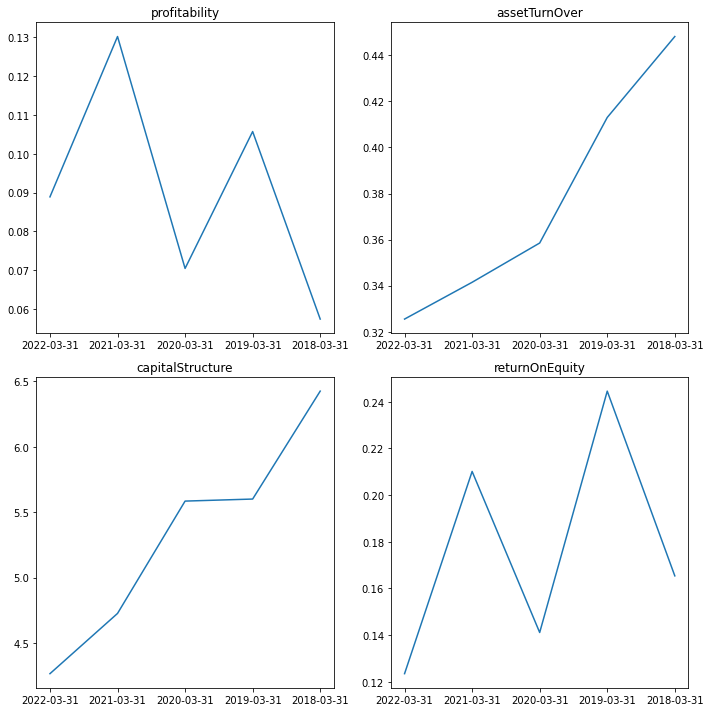

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(10,10))
x = df['date']

values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x,df[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()